In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
pip install mtcnn

In [25]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.image as img
import mtcnn
import matplotlib

In [26]:
class LoadDataset():
  def __init__(self):
    self.train_path = "/content/drive/MyDrive/CelebDataSet/data/train/"
    self.test_path   = "/content/drive/MyDrive/celebDataSet/data/val/"
    self.yarr , self.Y , self.xdict = [] , [] , dict()

    for i in os.listdir(self.train_path):
      self.yarr.append(i) 
    for i in self.yarr:
      self.xdict[i]=[]

    for i in os.listdir(self.train_path):
      for j in os.listdir(self.train_path+i):
        testImage = img.imread(self.train_path + i+ "/" + j )
        self.xdict[i].append(testImage)

    for i in self.xdict.keys():
      for j in range(len(self.xdict[i])):
        self.Y.append(i)
    print(self.xdict.keys())

  def ReturnDataset(self):
    return self.xdict , self.yarr , self.Y

  def Imshow(self,name,number):
    plt.imshow(self.xdict[name][number])
    plt.show()
  
  def MTCNN(self , name , number):
    
    detector = mtcnn.MTCNN()
    faces = detector.detect_faces(self.xdict[name][number])
    plt.imshow(self.xdict[name][number])
    def draw_facebox(result_list):
      ax = plt.gca()
      for result in faces:
        x, y, width, height = result['box']
        rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
        ax.add_patch(rect)
        plt.show()
    draw_facebox(faces)

dict_keys(['mindy_kaling', 'will_smith', 'lauren_cohan', 'sofia_vergara', 'simon_pegg', 'madonna', 'elton_john', 'anne_hathaway', 'dwayne_johnson', 'arnold_schwarzenegger', 'kate_beckinsale', 'jerry_seinfeld', 'ben_afflek', 'keanu_reeves'])


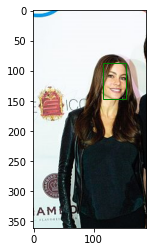

In [29]:
ld = LoadDataset()
ld.MTCNN("sofia_vergara",10)

In [27]:
class faceNet():
  def __init__(self):
    pass
  def batch_hard_triplet_loss(self,labels, embeddings, margin, squared=False):
    pairwise_dist = _pairwise_distances(embeddings, squared=squared)
    mask_anchor_positive = _get_anchor_positive_triplet_mask(labels)
    mask_anchor_positive = tf.to_float(mask_anchor_positive)
    anchor_positive_dist = tf.multiply(mask_anchor_positive, pairwise_dist)
    hardest_positive_dist = tf.reduce_max(anchor_positive_dist, axis=1, keepdims=True)
    mask_anchor_negative = _get_anchor_negative_triplet_mask(labels)
    mask_anchor_negative = tf.to_float(mask_anchor_negative)
    max_anchor_negative_dist = tf.reduce_max(pairwise_dist, axis=1, keepdims=True)
    anchor_negative_dist = pairwise_dist + max_anchor_negative_dist * (1.0 - mask_anchor_negative)
    hardest_negative_dist = tf.reduce_min(anchor_negative_dist, axis=1, keepdims=True)
    triplet_loss = tf.maximum(hardest_positive_dist - hardest_negative_dist + margin, 0.0)
    triplet_loss = tf.reduce_mean(triplet_loss)
    return triplet_loss
  
  def modelTrain(self):
    optmi = tf.train.adadelta(learning_rate=0.001,rho=0.95,epsilon=1e-07,name='Adadelta')
    _ , loss = optim.minimize(batch_hard_triplet_loss)
  def modelTestSave(self):
    pass